In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 30kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=6fcea3d00b2d20f5f25cf2936fe4bed1a1f59a54f90db7490044851616b6c7ed
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import face_recognition
import cv2
import pandas as pd


**Face Recognition**

The test images will only work if known face data contains those faces. 
The dataset which I have used has 80 images and is saved on my drive. 
That folder and the test image folder paths will be needed for the code to run.

*CSV and Image Directory path can be changed in the following code block for using different known faces*

In [ ]:
data_path = '/content/drive/My Drive/imgdataset/data1.csv' # The csv from drive contains 80 image file names and person's names.
image_dir = '/content/drive/My Drive/imgdataset/data1'    # The path for directory containing training images.

In [ ]:
#The image dataset is fed from drive it contains 80 images.

image_data = pd.read_csv(data_path) #The csv file contains image name and person's name in separate columns.
known_faces = []
for i in image_data['Image']:
  img = cv2.imread(image_dir+'/'+i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  encoding = face_recognition.face_encodings(img)[0]  #Each known face's encoding is saved in the known_faces list.
  known_faces.append(encoding)

In [ ]:
image_data.tail() #Image file name and person's name in the dataframe.

,Image,Name
75,z46.jpeg,'kiara knightley'
76,z47.jpeg,'emma watson'
77,z48.jpeg,'emma watson'
78,z49.jpeg,'daniel radcliff'
79,z50.jpeg,'margot robbie'


*Query or test image folder path can be changed in the following code block for using different test images.*

In [ ]:
query_path = '/content/drive/My Drive/imgdataset/data_query' #Path to the folder in the drive which contains test images.pa

In [ ]:
import os
queries = []
query_face = []
for i in os.listdir(query_path):  #Queries are fed from a drive folder it contains 5 test images.
  img = cv2.imread(query_path+'/'+i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  query_face.append(img)             #Test faces are saved in the query_face list.
  encoding = face_recognition.face_encodings(img)[0]    #Query encodings are saved in the queries list.
  queries.append(encoding)

In [ ]:
from scipy.spatial import distance  #To find distance or difference between encodings

def find_face(queries, query_face):
  fig, ax = plt.subplots(1, len(queries), figsize = (4*len(queries),4))

  for q in range(len(queries)):
    results = []
    for known in known_faces:
      d = distance.euclidean(queries[q],known) 
      results.append(d)
  
    face = results.index(min(results)) # Finding the most resembling answer
    ax[q].imshow(query_face[q])
    ax[q].set_title('Detected as '+str(image_data['Name'][face]), color='red')

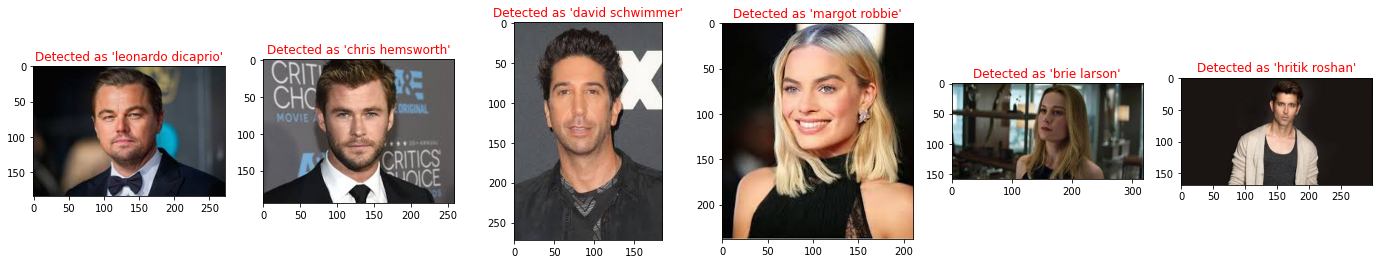

In [ ]:
find_face(queries, query_face)